## Homework 10: Earthquakes


### Cee Gould

##### Question 1

This question is exactly the same as part 3 of the lab
Download the file ‘earthquakes_since_1970.csv’. This file contains the longitude, latitude, depth and magnitude
of all events greater than M4.0 around the world, since 1970.

### a) Read the file

In [2]:
import numpy as np
import matplotlib.pyplot as plt


data = np.loadtxt('earthquakes_since_1970.csv', delimiter = ',')
#data = np.rot90(data)

In [3]:
print(data[:,3])

[4.8 4.2 4.2 ... 5.1 5.3 4.2]


In [4]:
long = data[:,0]
lat = data[:,1]
depth = data[:,2]
magnitude = data[:,3]
print(magnitude)


[4.8 4.2 4.2 ... 5.1 5.3 4.2]


### b) Plot a histogram of the magnitude distribution. What do you notice?

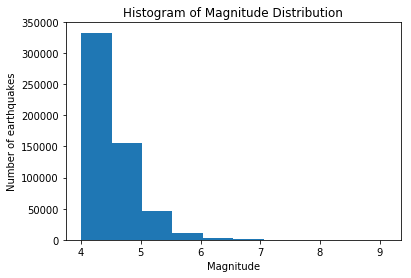

In [5]:
plt.hist(magnitude)
plt.xlabel('Magnitude')
plt.ylabel('Number of earthquakes')
plt.title('Histogram of Magnitude Distribution')
plt.show()

There are more earthquakes of Magnitudes over 100 than there are of Magnitudes below zero. Possibly an earthquake is more likely to be of a higher magnitude based on this information of past earthquakes

### c) Moment release

Use the equation M = log (M ) − 10.7 to determine the moment release from each of the earthquakes.
Remember that this gives the moment release in dyne cm (1 dyne cm = 1x10^-7 J). Convert these numbers into
joules and then plot a histogram.


(549514,)


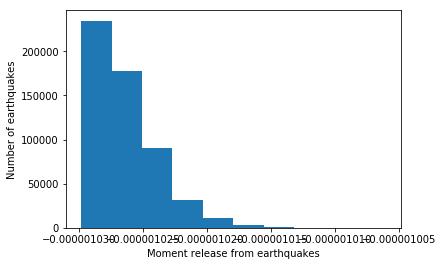

In [6]:
moment = []

for m in range(len(magnitude)):
    #if magnitude[m] > 0:        
        M = ((2/3) * np.log10(magnitude[m]) - 10.7) * 1e-7 #convert to joules
        moment.append(M)

print(np.shape(moment))

plt.hist(np.array(moment))
plt.xlabel('Moment release from earthquakes')
plt.ylabel('Number of earthquakes')
plt.show()


What proportion of the total energy release comes from the top 1% of earthquakes?

In [7]:
total_energy = (np.sum(moment)) #total energy release
print(total_energy)

-0.5640735834886977


In [8]:
one_percent = np.int(0.01 * len(magnitude)) #1% of earthquakes
print(one_percent)

5495


In [9]:
moment = sorted(moment, reverse = True)
print(moment[len(moment)-1])
print(moment[0])

-1.0298626672448023e-06
-1.0060639071785938e-06


In [10]:
one_percent_energy = np.sum(moment[0:(one_percent - 1)]) #energy from top 1 percent of earthquakes
print(one_percent_energy)

-0.005584852249168711


In [11]:
proportion = one_percent_energy/ total_energy
print(proportion)
print(proportion * 100, "percent")

0.009900928553731172
0.9900928553731172 percent


### d) The Gutenberg-Richter relation

The Gutenberg-Richter relation is an empirical equation relating the number of earthquakes observed in some
period to their magnitude
log 10(N) = a − bM
Where N is the number of earthquakes having magnitude > M

Plot log (N) vs M for this dataset and fit a straight line to obtain the values of a and b. Look up how to use np.polyfit()

Text(0,0.5,'N')

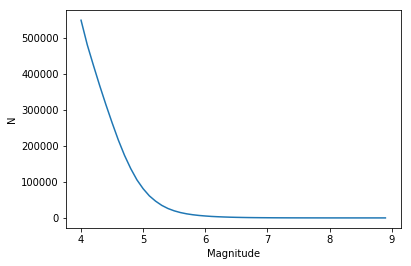

In [12]:
#magnitudes = magnitude

M = np.arange(4, 9,0.1)
greater_than = []
for element in M:
    gt = len(np.where(magnitude>=element)[0])
    greater_than.append(gt)

plt.plot(M, greater_than)
plt.xlabel('Magnitude')
plt.ylabel('N')



Text(0,0.5,'log10(N)')

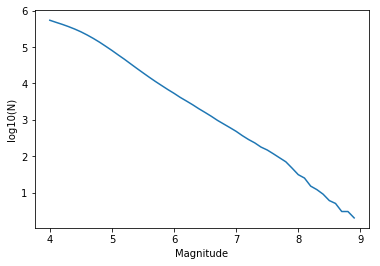

In [13]:
plt.plot(M, np.log10(greater_than))
plt.xlabel('Magnitude')
plt.ylabel('log10(N)')

In [14]:
z = np.polyfit(M, np.log10(greater_than), 1)
print('a = ', z[0], 'b = ', z[1])

a =  -1.1233602056072391 b =  10.471569922164171


## Question 2

In this question we’ll investigate the aftershock sequence of the 2011 Tohuku event. You are provided with a file
containing all events M>2 within a 2x2 degree box surrounding the main event, for time spanning 5 hours
before the event to two weeks afterwards

### a) Read the file

Read the file Tohuku_event_aftershocks.csv. The data looks like this, so you might want to consider how to
handle the column labels

In [15]:
from matplotlib.dates import datestr2num
from datetime import datetime

data = np.loadtxt('Tohuku_event_aftershocks.csv', delimiter = ',', skiprows = 1, usecols = (1,2,3,4,5))

In [16]:
long = data[:,0]
lat = data[:,1]
dep = data[:, 2]
mag = data[: ,3]
t_since_event = data[:, 4]

In [17]:
timestamp = np.loadtxt('Tohuku_event_aftershocks.csv', skiprows = 1, delimiter = ',', usecols = (0), dtype=(str))
print(timestamp[0])

2011-03-10T19:03:52.000000Z


In [18]:
years = []
months = []
days = []

hours = []
minutes = []
seconds = []

for i in range(len(timestamp)):
    
    year = timestamp[i][0:4]
    month = timestamp[i][5:7]
    day = timestamp[i][8:10]
    
    hour = timestamp[i][11:13]
    
    minute = timestamp[i][14:16]
    second = timestamp[i][17:19]
    
    
    
    years.append(year)
    months.append(month)
    days.append(day)
    hours.append(hour)
    minutes.append(minute)
    seconds.append(second)

In [19]:
time = []
for i in range(len(timestamp)):
    
    value = datetime.strptime(years[i] + '-' + months[i] + '-'+ days[i] + ' ' + hours[i] + ':' + minutes[i] + ':' + seconds[i], '%Y-%m-%d %H:%M:%S')
    time.append(value)
    

In [20]:
time = np.array(time)

Explore the data by plotting magnitude vs time. You should one interesting and one concerning thing about the
data. Comment on them.

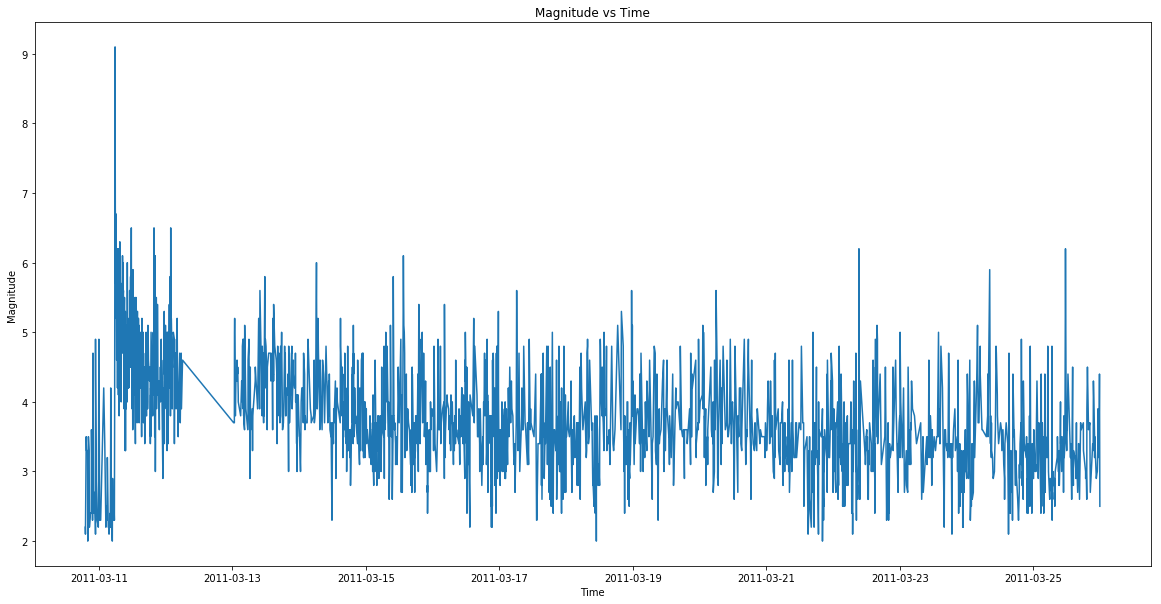

In [37]:
plt.figure(figsize=(20,10))
plt.plot(time, mag)
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Magnitude vs Time')
plt.show()

In [22]:
print('avg = ', np.average(mag), 'max = ', np.max(mag))

avg =  3.7805852299117513 max =  9.1


It is interesting that most of the earthquake magnitudes are around magnitude 4 in the days following the earthquake, and that the maximum magnitude during the earthquake is much larger than the aftershock magnitudes. It is concerning that there seems to be a gap in our data from March 12th, which prevents us from understanding more about the transitional period between the large magnitude earthquake and the aftershocks.

### b) Plot a histogram of the number of events over time

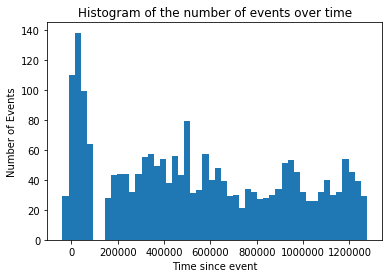

In [64]:
plt.hist(t_since_event,50)
plt.title('Histogram of the number of events over time')
plt.xlabel('Time since event')
plt.ylabel('Number of Events')
plt.show()

### c) Moment release

Lets assume all the events that occurred in this region after the M9.1 earthquake are aftershocks. Calculate the
total moment release from these aftershocks and compare it to the moment release of the main event.

In [72]:
aftershock_moment = []

for t in range(len(t_since_event)):
    if t_since_event[t] > 0:
        M = ((2/3) * np.log10(mag[t]) - 10.7) * 1e-7 #convert to joules
        aftershock_moment.append(M)
    if t_since_event[t] == 0:
        event_moment = ((2/3) * np.log10(mag[t]) - 10.7) * 1e-7

In [73]:
print(sum(aftershock_moment))
print(event_moment)

-0.0021701945450656166
-1.0060639071785938e-06


the event moment is much larger than the sum of all the aftershock moments

### d) Theoretical moment release

The Omori law is an empirical relationship between n, the frequency of aftershocks at time t after a mainshock.

# n = C / (k + t) * P

Where C, K and P are constants

Determine the number of aftershocks per hour from this database (hint: You can do this using plt.hist() by choosing bins equal to the number of hours in the dataset)

In [96]:
sum = 0
for t in range(len(t_since_event)):
    if t_since_event[t] > 0:
        sum += 1
print(sum)

2103


In [99]:
hours = t_since_event[len(t_since_event)-1]/60/60
print(hours, 'hours')

354.19149999999996 hours


In [ ]:
plt.hist(t_since_event)